# Import Data / Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 500)

In [2]:
liquor_data = pd.read_csv(r"C:\Users\52450\Downloads\iowa_liquor_sales_2018_2021.csv")

# Explore Data and Ensure Data Types Correct, Remove Nulls, Duplicates, Deal w/ Time Series, Etc.

We can see our data is a timeseries of orders made by stores in particular locations. Orders contain information on merchant and product info. In additon, we have values related to the price and volume of products sold.

Let's first clean our data for obvious issues with completeness, format, accuracy, etc.

In [3]:
liquor_data.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,INV-14210900003,09/04/2018,4617,LICKETY LIQUOR,2501 HUBBELL AVE,DES MOINES,50317.0,POINT (-93.570489 41.607817),77.0,POLK,1011400.0,TENNESSEE WHISKIES,85.0,BROWN FORMAN CORP.,26826,JACK DANIELS OLD #7 BLACK LBL,12,750,15.57,23.36,4,93.44,3.00,0.79
1,INV-19229700001,05/08/2019,3477,SAM'S CLUB 6472 / COUNCIL BLUFFS,3221 MANAWA CENTRE DR,COUNCIL BLUFFS,51501.0,POINT (-95.847163 41.225208),78.0,POTTAWATTAMIE,1052100.0,IMPORTED BRANDIES,420.0,MOET HENNESSY USA,48122,HENNESSY XO,12,750,99.99,149.99,1,149.99,0.75,0.19
2,INV-19459200063,05/20/2019,2614,HY-VEE #3 FOOD & DRUGSTORE / DAVENPORT,1823 E KIMBERLY RD,DAVENPORT,52807.0,POINT (-90.548919 41.55678100000001),82.0,SCOTT,1062400.0,SPICED RUM,260.0,DIAGEO AMERICAS,43285,CAPTAIN MORGAN ORIGINAL SPICED RUM PET,12,750,9.06,13.59,24,326.16,18.00,4.75
3,INV-19177900022,05/06/2019,4162,FAREWAY STORES #963 / CEDAR RAPIDS,4220 16TH AVE SW,CEDAR RAPIDS,52404.0,POINT (-91.726726 41.963791),57.0,LINN,1011100.0,BLENDED WHISKIES,297.0,LAIRD & COMPANY,23828,FIVE STAR,6,1750,7.62,11.43,6,68.58,10.50,2.77
4,INV-18278900013,03/21/2019,3670,WAL-MART 2827 / CORALVILLE,2801 COMMERCE DR,CORALVILLE,52241.0,POINT (-91.610774 41.695806),52.0,JOHNSON,1031100.0,AMERICAN VODKAS,255.0,INFINIUM SPIRITS,37888,SEAGRAMS EXTRA SMOOTH VODKA,6,1750,10.00,15.00,6,90.00,10.50,2.77


In [4]:
liquor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10087862 entries, 0 to 10087861
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice/Item Number    object 
 1   Date                   object 
 2   Store Number           int64  
 3   Store Name             object 
 4   Address                object 
 5   City                   object 
 6   Zip Code               float64
 7   Store Location         object 
 8   County Number          float64
 9   County                 object 
 10  Category               float64
 11  Category Name          object 
 12  Vendor Number          float64
 13  Vendor Name            object 
 14  Item Number            int64  
 15  Item Description       object 
 16  Pack                   int64  
 17  Bottle Volume (ml)     int64  
 18  State Bottle Cost      float64
 19  State Bottle Retail    float64
 20  Bottles Sold           int64  
 21  Sale (Dollars)         float64
 22  Volume Sold (Lit

In [5]:
liquor_data = liquor_data.drop_duplicates()
# no duplicate rows found

In [6]:
#We also want to assess Null or NA values in key columns.
liquor_data.isnull().sum()

Invoice/Item Number            0
Date                           0
Store Number                   0
Store Name                     0
Address                     7328
City                        7328
Zip Code                    7328
Store Location           1003882
County Number               7330
County                      7328
Category                    5743
Category Name               5743
Vendor Number                  7
Vendor Name                    7
Item Number                    0
Item Description               0
Pack                           0
Bottle Volume (ml)             0
State Bottle Cost              0
State Bottle Retail            0
Bottles Sold                   0
Sale (Dollars)                 0
Volume Sold (Liters)           0
Volume Sold (Gallons)          0
dtype: int64

In [7]:
#Let's now remove all rows for which there are NA values except Store Location, for ease of data transformation
liquor_data = liquor_data.dropna(subset=['Address', 'City', 'Zip Code', 'County Number', 'County','Category','Category Name', 'Vendor Number', 'Vendor Name'])

In [8]:
#Remove non-essential or redundant columns, for now
liquor_data.drop(['Store Number', 'Item Number', 'County Number', 'Address', 'Vendor Number', 'Category'], axis=1)

,Invoice/Item Number,Date,Store Name,City,Zip Code,Store Location,County,Category Name,Vendor Name,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,INV-14210900003,09/04/2018,LICKETY LIQUOR,DES MOINES,50317.0,POINT (-93.570489 41.607817),POLK,TENNESSEE WHISKIES,BROWN FORMAN CORP.,JACK DANIELS OLD #7 BLACK LBL,12,750,15.57,23.36,4,93.44,3.00,0.79
1,INV-19229700001,05/08/2019,SAM'S CLUB 6472 / COUNCIL BLUFFS,COUNCIL BLUFFS,51501.0,POINT (-95.847163 41.225208),POTTAWATTAMIE,IMPORTED BRANDIES,MOET HENNESSY USA,HENNESSY XO,12,750,99.99,149.99,1,149.99,0.75,0.19
2,INV-19459200063,05/20/2019,HY-VEE #3 FOOD & DRUGSTORE / DAVENPORT,DAVENPORT,52807.0,POINT (-90.548919 41.55678100000001),SCOTT,SPICED RUM,DIAGEO AMERICAS,CAPTAIN MORGAN ORIGINAL SPICED RUM PET,12,750,9.06,13.59,24,326.16,18.00,4.75
3,INV-19177900022,05/06/2019,FAREWAY STORES #963 / CEDAR RAPIDS,CEDAR RAPIDS,52404.0,POINT (-91.726726 41.963791),LINN,BLENDED WHISKIES,LAIRD & COMPANY,FIVE STAR,6,1750,7.62,11.43,6,68.58,10.50,2.77
4,INV-18278900013,03/21/2019,WAL-MART 2827 / CORALVILLE,CORALVILLE,52241.0,POINT (-91.610774 41.695806),JOHNSON,AMERICAN VODKAS,INFINIUM SPIRITS,SEAGRAMS EXTRA SMOOTH VODKA,6,1750,10.00,15.00,6,90.00,10.50,2.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10087857,INV-18153800017,03/14/2019,WAL-MART 1732 / DENISON,DENISON,51442.0,NaN,CRAWFORD,AMERICAN DRY GINS,LUXCO INC,PARAMOUNT GIN,6,1750,7.11,10.67,6,64.02,10.50,2.77
10087858,INV-17984900016,03/07/2019,"CENTRAL CITY LIQUOR, INC.",DES MOINES,50314.0,POINT (-93.619787 41.60566),POLK,TEMPORARY & SPECIALTY PACKAGES,PERNOD RICARD USA,JAMESON W/2-50MLS,6,850,15.99,23.99,6,143.94,5.10,1.34
10087859,INV-18203500008,03/18/2019,CROSSROADS WINE & SPIRITS LLC,DUNLAP,51529.0,POINT (-95.602969 41.854728),HARRISON,STRAIGHT BOURBON WHISKIES,JIM BEAM BRANDS,JIM BEAM,12,1000,12.59,18.89,12,226.68,12.00,3.17
10087860,INV-18440700048,03/29/2019,RODGERS SPIRITS AND MORE,WINTERSET,50273.0,POINT (-94.013374 41.336405),MADISON,TENNESSEE WHISKIES,BROWN FORMAN CORP.,JACK DANIELS OLD #7 BLACK LABEL MINI,12,500,9.06,13.59,1,13.59,0.50,0.13


In [9]:
#rename all columns with spaces to those with _
liquor_data = liquor_data.rename(columns={"Invoice/Item Number":"Invoice_Number","Store Name":"Store_Name","Zip Code":"Zip_Code", "Store Location":"Store_Location", "Category Name":"Category_Name","Vendor Name":"Vendor_Name","Item Description":"Item_Description","Bottle Volume (ml)":"Bottle_Volume_ML","State Bottle Cost":"State_Bottle_Cost","State Bottle Retail":"State_Bottle_Retail","Bottles Sold":"Bottles_Sold","Sale (Dollars)":"Sale_Dollars","Volume Sold (Liters)":"Volume_Sold_Liters","Volume Sold (Gallons)":"Volume_Sold_Gallons"})
liquor_data.head()

,Invoice_Number,Date,Store Number,Store_Name,Address,City,Zip_Code,Store_Location,County Number,County,Category,Category_Name,Vendor Number,Vendor_Name,Item Number,Item_Description,Pack,Bottle_Volume_ML,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_Liters,Volume_Sold_Gallons
0,INV-14210900003,09/04/2018,4617,LICKETY LIQUOR,2501 HUBBELL AVE,DES MOINES,50317.0,POINT (-93.570489 41.607817),77.0,POLK,1011400.0,TENNESSEE WHISKIES,85.0,BROWN FORMAN CORP.,26826,JACK DANIELS OLD #7 BLACK LBL,12,750,15.57,23.36,4,93.44,3.00,0.79
1,INV-19229700001,05/08/2019,3477,SAM'S CLUB 6472 / COUNCIL BLUFFS,3221 MANAWA CENTRE DR,COUNCIL BLUFFS,51501.0,POINT (-95.847163 41.225208),78.0,POTTAWATTAMIE,1052100.0,IMPORTED BRANDIES,420.0,MOET HENNESSY USA,48122,HENNESSY XO,12,750,99.99,149.99,1,149.99,0.75,0.19
2,INV-19459200063,05/20/2019,2614,HY-VEE #3 FOOD & DRUGSTORE / DAVENPORT,1823 E KIMBERLY RD,DAVENPORT,52807.0,POINT (-90.548919 41.55678100000001),82.0,SCOTT,1062400.0,SPICED RUM,260.0,DIAGEO AMERICAS,43285,CAPTAIN MORGAN ORIGINAL SPICED RUM PET,12,750,9.06,13.59,24,326.16,18.00,4.75
3,INV-19177900022,05/06/2019,4162,FAREWAY STORES #963 / CEDAR RAPIDS,4220 16TH AVE SW,CEDAR RAPIDS,52404.0,POINT (-91.726726 41.963791),57.0,LINN,1011100.0,BLENDED WHISKIES,297.0,LAIRD & COMPANY,23828,FIVE STAR,6,1750,7.62,11.43,6,68.58,10.50,2.77
4,INV-18278900013,03/21/2019,3670,WAL-MART 2827 / CORALVILLE,2801 COMMERCE DR,CORALVILLE,52241.0,POINT (-91.610774 41.695806),52.0,JOHNSON,1031100.0,AMERICAN VODKAS,255.0,INFINIUM SPIRITS,37888,SEAGRAMS EXTRA SMOOTH VODKA,6,1750,10.00,15.00,6,90.00,10.50,2.77


In [10]:
#checking we have no nulls in our new category_name_summarized column
liquor_data.isnull().sum()

Invoice_Number              0
Date                        0
Store Number                0
Store_Name                  0
Address                     0
City                        0
Zip_Code                    0
Store_Location         996132
County Number               0
County                      0
Category                    0
Category_Name               0
Vendor Number               0
Vendor_Name                 0
Item Number                 0
Item_Description            0
Pack                        0
Bottle_Volume_ML            0
State_Bottle_Cost           0
State_Bottle_Retail         0
Bottles_Sold                0
Sale_Dollars                0
Volume_Sold_Liters          0
Volume_Sold_Gallons         0
dtype: int64

In [11]:
#We also want to convert our columns data types that make sense (e.g., bottle volume should be a float)
liquor_data['Bottle_Volume_ML'] = liquor_data['Bottle_Volume_ML'].astype(float)
liquor_data['Bottles_Sold'] = liquor_data['Bottles_Sold'].astype(float)
#convert timestamps which are strings to datetimes
liquor_data['Date'] = pd.to_datetime(liquor_data['Date'])

In [12]:
#create month, day, year columns from date-time
liquor_data["Month"] = liquor_data["Date"].dt.month
liquor_data["Quarter"] = liquor_data["Date"].dt.quarter
liquor_data["Year"] = liquor_data["Date"].dt.year
#now sort descending by date-time
liquor_data = liquor_data.sort_values(by='Date', ascending=True)

In [13]:
#Convert each time column into a string to combine eventually
liquor_data['Month'] = liquor_data['Month'].astype(str)
liquor_data['Year'] = liquor_data['Year'].astype(str)
liquor_data['Quarter'] = liquor_data['Quarter'].astype(str)
#Now create month-year column to best organize the time series
liquor_data["Month_Year"] = liquor_data["Month"] + "-" + liquor_data["Year"]

In [14]:
liquor_data["City"].value_counts()

DES MOINES      835337
CEDAR RAPIDS    650716
DAVENPORT       422293
WATERLOO        315443
SIOUX CITY      305814
                 ...  
MILO               158
CAMBRIDGE          147
EVERLY              90
BUSSEY              85
WASHTA              56
Name: City, Length: 450, dtype: int64

In [15]:
liquor_data["Store_Name"].value_counts()

HY-VEE #3 / BDI / DES MOINES            76589
CENTRAL CITY 2                          68077
CENTRAL CITY LIQUOR, INC.               62538
HY-VEE FOOD STORE / CEDAR FALLS         61398
HY-VEE WINE AND SPIRITS / BETTENDORF    52904
                                        ...  
HY-VEE #7                                   1
CATS EYE DISTILLERY, LLC                    1
SMOKIN' JOE'S #15 TOBACCO & LIQUOR O        1
THOME ENTERPRISES LLC                       1
NEIGHBORHOOD LIQUOR HOUSE / ANKENY          1
Name: Store_Name, Length: 2259, dtype: int64

In [16]:
#Let's understand the distribution of sales per invoice, to see if there are any outliers
liquor_data['Sale_Dollars'].describe()
# We see the max outlier transaction is ~$280K, with most (75%) falling below $150.

count    1.007479e+07
mean     1.510051e+02
std      5.326850e+02
min      0.000000e+00
25%      3.675000e+01
50%      7.866000e+01
75%      1.548000e+02
max      2.795573e+05
Name: Sale_Dollars, dtype: float64

In [17]:
#Sub-dividing our data into typical transaction sizes, let's look at the frequency distribution
bins = [0,50,100,500,1000,5000,10000,50000,100000,300000]
liquor_data['Sale_Dollars'].value_counts(bins=bins)
#We see the majority of individual sales are <$500, with a few outliers >$1000

(100.0, 500.0]          3709136
(-0.001, 50.0]          3330923
(50.0, 100.0]           2706089
(500.0, 1000.0]          194879
(1000.0, 5000.0]         118848
(5000.0, 10000.0]         11016
(10000.0, 50000.0]         3852
(50000.0, 100000.0]          38
(100000.0, 300000.0]         13
Name: Sale_Dollars, dtype: int64

# 1. What impact did Covid have on the overall liquor market in Iowa?

a. What trends evolved over the next 3-18 months?

Approach:
- Look at total liquor market key metrics monthly, quarterly, and yearly and gather trends starting higher then lower level of granularity
- Key metrics include total sales (dollars), total volume, Avg price, and avg volume (Avg Liters sold or bottles sold per transaction)
- We will want to be conscious of seasonality and calculate YoY changes each month

In [18]:
# Create tables with sales and other relevant metrics over time. Start with month-level
liquor_time_group_df = liquor_data.groupby(['Year','Quarter','Month']).agg({'Invoice_Number':['count'],'Sale_Dollars':['sum'], 'Volume_Sold_Liters':['sum'],'Bottles_Sold':['sum'],'Pack':['sum']})
liquor_time_group_df.columns = ['_'.join(col).strip() for col in liquor_time_group_df.columns.values]
liquor_time_group_df = liquor_time_group_df.reset_index()
liquor_time_group_df["Year_Quarter_Month"] = liquor_time_group_df["Year"] + "-" + liquor_time_group_df["Quarter"] + "-" + liquor_time_group_df["Month"]
liquor_time_group_df["Sale_Dollars_Millions"] = liquor_time_group_df["Sale_Dollars_sum"]/1000000
liquor_time_group_df

,Year,Quarter,Month,Invoice_Number_count,Sale_Dollars_sum,Volume_Sold_Liters_sum,Bottles_Sold_sum,Pack_sum,Year_Quarter_Month,Sale_Dollars_Millions
0,2017,4,12,114167,15212528.23,966233.94,1125266.0,1404123,2017-4-12,15.212528
1,2018,1,1,189522,22355303.14,1500078.55,1810697.0,2388093,2018-1-1,22.355303
2,2018,1,2,164990,22717693.09,1532636.23,1749529.0,2074345,2018-1-2,22.717693
3,2018,1,3,186511,24836777.48,1626429.74,1923609.0,2340771,2018-1-3,24.836777
4,2018,2,4,187259,26186442.57,1765777.59,2016078.0,2341022,2018-2-4,26.186443
...,...,...,...,...,...,...,...,...,...,...
44,2021,3,8,218257,36501798.74,2108430.81,2646637.0,2612741,2021-3-8,36.501799
45,2021,3,9,212398,35837061.02,2066298.68,2589685.0,2519689,2021-3-9,35.837061
46,2021,4,10,209870,38085762.36,2087140.47,2709511.0,2510324,2021-4-10,38.085762
47,2021,4,11,222110,37962993.75,2121658.51,2617942.0,2597731,2021-4-11,37.962994


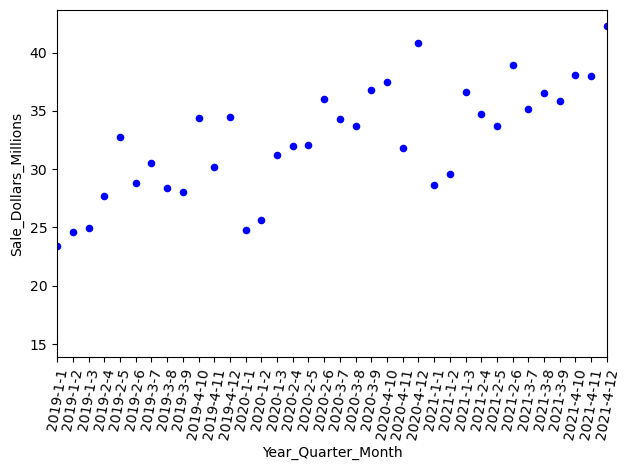

In [20]:
# Create plot to visualize trends over time
%matplotlib inline
from matplotlib.ticker import ScalarFormatter
liquor_time_group_df.plot(x='Year_Quarter_Month', y='Sale_Dollars_Millions', kind='scatter', color='blue')
plt.xlim('2019-1-1', '2021-4-12')
plt.xticks(rotation=80)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.tight_layout()
plt.show()

Insights:
- Once COVID starts in March, 2020, we see large YoY increase in sales, greater than previous YoY increases
- This makes sense because of people's 'stock up' mentality: many folks stocked up on more food, drink to 'last through' the pandemic
- We should look at the quarter level and year levels to see seasonality effexts

In [21]:
# Create quarter-level data frame
liquor_time_group_df = liquor_data.groupby(['Year','Quarter']).agg({'Invoice_Number':['count'],'Sale_Dollars':['sum'], 'Volume_Sold_Liters':['sum'],'Bottles_Sold':['sum'],'Pack':['sum']})
liquor_time_group_df.columns = ['_'.join(col).strip() for col in liquor_time_group_df.columns.values]
liquor_time_group_df = liquor_time_group_df.reset_index()
liquor_time_group_df["Year_Quarter"] = liquor_time_group_df["Year"] + "-" + liquor_time_group_df["Quarter"]
liquor_time_group_df["Sale_Dollars_Millions"] = liquor_time_group_df["Sale_Dollars_sum"]/1000000
liquor_time_group_df

,Year,Quarter,Invoice_Number_count,Sale_Dollars_sum,Volume_Sold_Liters_sum,Bottles_Sold_sum,Pack_sum,Year_Quarter,Sale_Dollars_Millions
0,2017,4,114167,1.521253e+07,966233.94,1125266.0,1404123,2017-4,15.212528
1,2018,1,541023,6.990977e+07,4659144.52,5483835.0,6803209,2018-1,69.909774
2,2018,2,606421,8.483571e+07,5740942.70,6531603.0,7549989,2018-2,84.835710
3,2018,3,572814,8.035392e+07,5349300.09,6199133.0,7154297,2018-3,80.353918
4,2018,4,631582,9.821180e+07,6095695.28,7168365.0,7827349,2018-4,98.211798
5,2019,1,532749,7.303474e+07,4846991.88,5713758.0,6672573,2019-1,73.034744
6,2019,2,605451,8.926838e+07,5883553.31,6909779.0,7522232,2019-2,89.268382
7,2019,3,593526,8.693724e+07,5584271.00,6729995.0,7392789,2019-3,86.937245
8,2019,4,640947,9.903957e+07,5932915.29,7423227.0,7903443,2019-4,99.039573
9,2020,1,576819,8.161556e+07,5149494.33,6397665.0,7144614,2020-1,81.615560


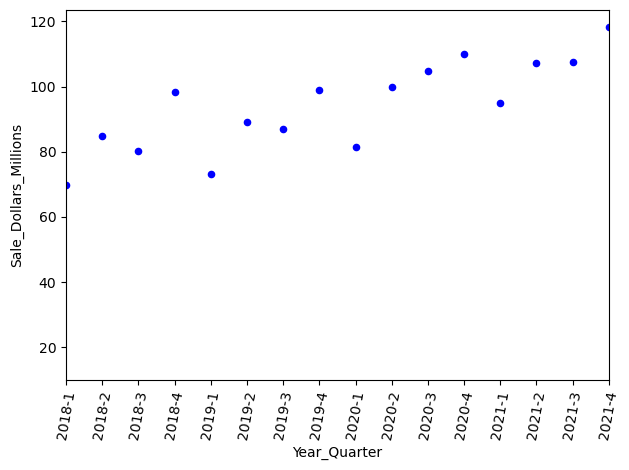

In [22]:
# Create plot to visualize trends over time
%matplotlib inline
from matplotlib.ticker import ScalarFormatter
liquor_time_group_df.plot(x='Year_Quarter', y='Sale_Dollars_Millions', kind='scatter', color='blue')
plt.xlim('2018-1', '2021-4')
plt.xticks(rotation=80)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.tight_layout()
plt.show()

Insights:
- We see clear seasonality effects on sales, with peak sales during the holidays and increase in sales once weather gets warmer spring/summer
- To control for seasonality, let's plot year- level sales

In [23]:
# Create year-level data frame
liquor_time_group_df = liquor_data.groupby(['Year']).agg({'Invoice_Number':['count'],'Sale_Dollars':['sum'], 'Volume_Sold_Liters':['sum'],'Bottles_Sold':['sum'],'Pack':['sum']})
liquor_time_group_df.columns = ['_'.join(col).strip() for col in liquor_time_group_df.columns.values]
liquor_time_group_df = liquor_time_group_df.reset_index()
liquor_time_group_df["Year"] = liquor_time_group_df["Year"]
liquor_time_group_df["Sale_Dollars_Millions"] = liquor_time_group_df["Sale_Dollars_sum"]/1000000
liquor_time_group_df = liquor_time_group_df[liquor_time_group_df['Year'] != '2017']
liquor_time_group_df

,Year,Invoice_Number_count,Sale_Dollars_sum,Volume_Sold_Liters_sum,Bottles_Sold_sum,Pack_sum,Sale_Dollars_Millions
1,2018,2351840,3.333112e+08,21845082.59,25382936.0,29334844,333.311200
2,2019,2372673,3.482799e+08,22247731.48,26776759.0,29491037,348.279944
3,2020,2613548,3.964730e+08,24205422.43,29830600.0,31744858,396.472957
4,2021,2622566,4.280682e+08,24752252.66,31201269.0,31314562,428.068179


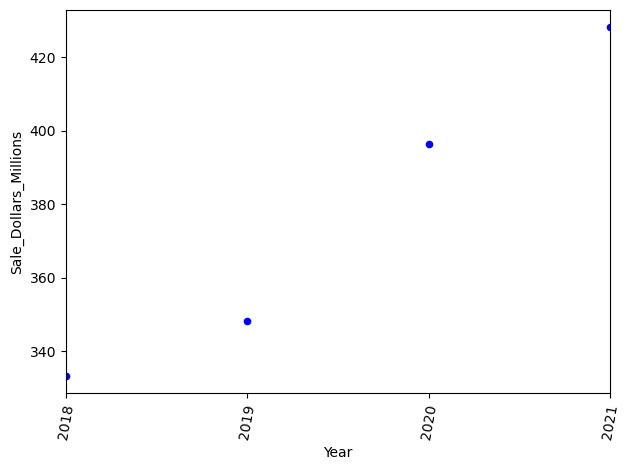

In [24]:
%matplotlib inline
from matplotlib.ticker import ScalarFormatter
liquor_time_group_df.plot(x='Year', y='Sale_Dollars_Millions', kind='scatter', color='blue')
plt.xlim('2018', '2021')
plt.xticks(rotation=80)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.tight_layout()
plt.show()

Insights:
- We see increases in sales, # transactions, bottles/volume sold across the years, but there seems to be the largest YoY increase between 2019 and 2020, which makes sense, given extra demand from COVID in the first year
- We can see this YOY increases settles down again between 2020 and 2021, which makes sense since 'stock up' behavior likely slows down in 2021 since COVID isn't as 'new'
Let's now get extra quantitative and view all of these as % changes YoY:

In [25]:
# convert above data frame value columns to % change columns
Sales = [333.311200, 348.279944, 396.472957, 428.068179]
Sales_df = pd.Series(Sales)
sales_percent_change = Sales_df.pct_change() * 100
print(sales_percent_change)

0          NaN
1     4.490921
2    13.837436
3     7.969074
dtype: float64


Insights:
- Sales % increase is greatest between 2020 and 2019, at ~14%. While YoY growth slows 2020 to 2021, it is still larger than historical growth rates
- It is clear there may be lasting changes in consumer behavior, increasing the size of the liquor market in Iowa.

b. Was there a notable shift in the types of products purchased in terms of pack
Size?

The pack size can be thought of as the size of the order. The original pack size does not align with actual # bottles order byt the distributor. Therefore, we should look at avg size of orders as avg volume of liquor sold, avg bottles sold.

In [26]:
# Create month-level data frame
liquor_time_group_df = liquor_data.groupby(['Year','Quarter','Month']).agg({'Invoice_Number':['count'],'Sale_Dollars':['sum'], 'Volume_Sold_Liters':['sum'],'Bottles_Sold':['sum'],'Pack':['sum']})
liquor_time_group_df.columns = ['_'.join(col).strip() for col in liquor_time_group_df.columns.values]
liquor_time_group_df = liquor_time_group_df.reset_index()
liquor_time_group_df["Year_Quarter_Month"] = liquor_time_group_df["Year"] + "-" + liquor_time_group_df["Quarter"] + "-" + liquor_time_group_df["Month"]
liquor_time_group_df["Sale_Dollars_Millions"] = liquor_time_group_df["Sale_Dollars_sum"]/1000000
liquor_time_group_df

,Year,Quarter,Month,Invoice_Number_count,Sale_Dollars_sum,Volume_Sold_Liters_sum,Bottles_Sold_sum,Pack_sum,Year_Quarter_Month,Sale_Dollars_Millions
0,2017,4,12,114167,15212528.23,966233.94,1125266.0,1404123,2017-4-12,15.212528
1,2018,1,1,189522,22355303.14,1500078.55,1810697.0,2388093,2018-1-1,22.355303
2,2018,1,2,164990,22717693.09,1532636.23,1749529.0,2074345,2018-1-2,22.717693
3,2018,1,3,186511,24836777.48,1626429.74,1923609.0,2340771,2018-1-3,24.836777
4,2018,2,4,187259,26186442.57,1765777.59,2016078.0,2341022,2018-2-4,26.186443
...,...,...,...,...,...,...,...,...,...,...
44,2021,3,8,218257,36501798.74,2108430.81,2646637.0,2612741,2021-3-8,36.501799
45,2021,3,9,212398,35837061.02,2066298.68,2589685.0,2519689,2021-3-9,35.837061
46,2021,4,10,209870,38085762.36,2087140.47,2709511.0,2510324,2021-4-10,38.085762
47,2021,4,11,222110,37962993.75,2121658.51,2617942.0,2597731,2021-4-11,37.962994


In [27]:
# Calculate relevant metrics
liquor_time_group_df["Avg_Volume_Per_Transaction_Liters"] = liquor_time_group_df["Volume_Sold_Liters_sum"]/liquor_time_group_df["Invoice_Number_count"]
liquor_time_group_df["Avg_Bottles_Per_Transaction_Number"] = liquor_time_group_df["Bottles_Sold_sum"]/liquor_time_group_df["Invoice_Number_count"]
liquor_time_group_df["Avg_Pack_Size_Per_Transaction_Number"] = liquor_time_group_df["Pack_sum"]/liquor_time_group_df["Invoice_Number_count"]
liquor_time_group_df

,Year,Quarter,Month,Invoice_Number_count,Sale_Dollars_sum,Volume_Sold_Liters_sum,Bottles_Sold_sum,Pack_sum,Year_Quarter_Month,Sale_Dollars_Millions,Avg_Volume_Per_Transaction_Liters,Avg_Bottles_Per_Transaction_Number,Avg_Pack_Size_Per_Transaction_Number
0,2017,4,12,114167,15212528.23,966233.94,1125266.0,1404123,2017-4-12,15.212528,8.463338,9.856316,12.298852
1,2018,1,1,189522,22355303.14,1500078.55,1810697.0,2388093,2018-1-1,22.355303,7.915063,9.554020,12.600611
2,2018,1,2,164990,22717693.09,1532636.23,1749529.0,2074345,2018-1-2,22.717693,9.289267,10.603849,12.572550
3,2018,1,3,186511,24836777.48,1626429.74,1923609.0,2340771,2018-1-3,24.836777,8.720289,10.313649,12.550311
4,2018,2,4,187259,26186442.57,1765777.59,2016078.0,2341022,2018-2-4,26.186443,9.429601,10.766254,12.501519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,2021,3,8,218257,36501798.74,2108430.81,2646637.0,2612741,2021-3-8,36.501799,9.660312,12.126241,11.970938
45,2021,3,9,212398,35837061.02,2066298.68,2589685.0,2519689,2021-3-9,35.837061,9.728428,12.192605,11.863054
46,2021,4,10,209870,38085762.36,2087140.47,2709511.0,2510324,2021-4-10,38.085762,9.944921,12.910426,11.961328
47,2021,4,11,222110,37962993.75,2121658.51,2617942.0,2597731,2021-4-11,37.962994,9.552287,11.786691,11.695696


In [29]:
liquor_time_group_df = liquor_data.groupby(['Year']).agg({'Invoice_Number':['count'],'Sale_Dollars':['sum'], 'Volume_Sold_Liters':['sum'],'Bottles_Sold':['sum'],'Pack':['sum']})
liquor_time_group_df.columns = ['_'.join(col).strip() for col in liquor_time_group_df.columns.values]
liquor_time_group_df = liquor_time_group_df.reset_index()
liquor_time_group_df["Sale_Dollars_Millions"] = liquor_time_group_df["Sale_Dollars_sum"]/1000000
liquor_time_group_df

,Year,Invoice_Number_count,Sale_Dollars_sum,Volume_Sold_Liters_sum,Bottles_Sold_sum,Pack_sum,Sale_Dollars_Millions
0,2017,114167,1.521253e+07,966233.94,1125266.0,1404123,15.212528
1,2018,2351840,3.333112e+08,21845082.59,25382936.0,29334844,333.311200
2,2019,2372673,3.482799e+08,22247731.48,26776759.0,29491037,348.279944
3,2020,2613548,3.964730e+08,24205422.43,29830600.0,31744858,396.472957
4,2021,2622566,4.280682e+08,24752252.66,31201269.0,31314562,428.068179


In [30]:
# Calculate relevant metrics
liquor_time_group_df["Avg_Volume_Per_Transaction_Liters"] = liquor_time_group_df["Volume_Sold_Liters_sum"]/liquor_time_group_df["Invoice_Number_count"]
liquor_time_group_df["Avg_Bottles_Per_Transaction_Number"] = liquor_time_group_df["Bottles_Sold_sum"]/liquor_time_group_df["Invoice_Number_count"]
liquor_time_group_df["Avg_Pack_Size_Per_Transaction_Number"] = liquor_time_group_df["Pack_sum"]/liquor_time_group_df["Invoice_Number_count"]
liquor_time_group_df

,Year,Invoice_Number_count,Sale_Dollars_sum,Volume_Sold_Liters_sum,Bottles_Sold_sum,Pack_sum,Sale_Dollars_Millions,Avg_Volume_Per_Transaction_Liters,Avg_Bottles_Per_Transaction_Number,Avg_Pack_Size_Per_Transaction_Number
0,2017,114167,1.521253e+07,966233.94,1125266.0,1404123,15.212528,8.463338,9.856316,12.298852
1,2018,2351840,3.333112e+08,21845082.59,25382936.0,29334844,333.311200,9.288507,10.792799,12.473146
2,2019,2372673,3.482799e+08,22247731.48,26776759.0,29491037,348.279944,9.376653,11.285482,12.429457
3,2020,2613548,3.964730e+08,24205422.43,29830600.0,31744858,396.472957,9.261518,11.413833,12.146269
4,2021,2622566,4.280682e+08,24752252.66,31201269.0,31314562,428.068179,9.438181,11.897229,11.940429


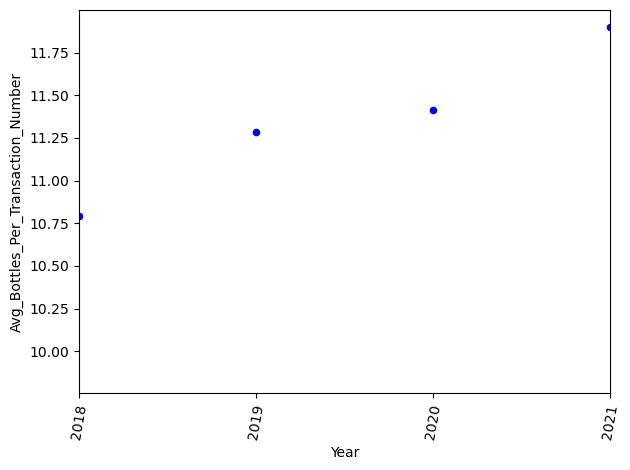

In [31]:
from matplotlib.ticker import ScalarFormatter
liquor_time_group_df.plot(x='Year', y='Avg_Bottles_Per_Transaction_Number', kind='scatter', color='blue')
plt.xlim('2018', '2021')
plt.xticks(rotation=80)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.tight_layout()
plt.show()

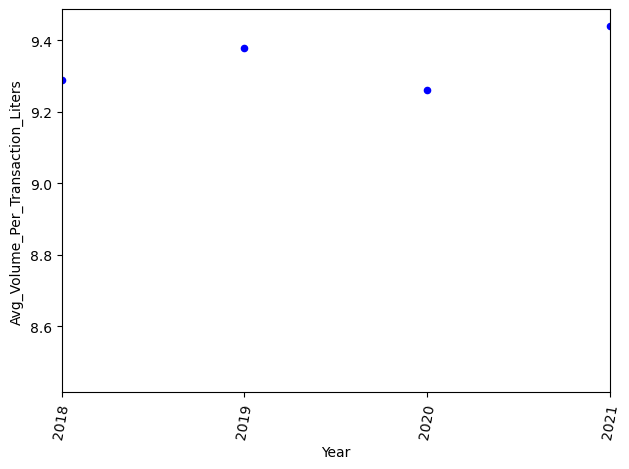

In [32]:
from matplotlib.ticker import ScalarFormatter
liquor_time_group_df.plot(x='Year', y='Avg_Volume_Per_Transaction_Liters', kind='scatter', color='blue')
plt.xlim('2018', '2021')
plt.xticks(rotation=80)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.tight_layout()
plt.show()

In [33]:
# Filter data to only include dates before COVID
liquor_data_before_covid = liquor_data[liquor_data['Date'] < pd.to_datetime('2020-03-01')]
liquor_data_before_covid

,Invoice_Number,Date,Store Number,Store_Name,Address,City,Zip_Code,Store_Location,County Number,County,Category,Category_Name,Vendor Number,Vendor_Name,Item Number,Item_Description,Pack,Bottle_Volume_ML,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_Liters,Volume_Sold_Gallons,Month,Quarter,Year,Month_Year
8664234,INV-09250800015,2017-12-15,4594,QUIK TRIP #554 / SW 63RD DM,901 SW 63RD ST,DES MOINES,50312.0,POINT (-93.703165 41.569715),77.0,POLK,1031200.0,AMERICAN FLAVORED VODKA,205.0,E & J GALLO WINERY,40593,NEW AMSTERDAM PEACH,24,375.0,3.50,5.25,4.0,21.00,1.50,0.40,12,4,2017,12-2017
8676503,INV-09255900005,2017-12-15,5259,GAMEDAY LIQUOR,924 LOCUST ST,GLENWOOD,51534.0,POINT (-95.916235 41.284951),65.0,MILLS,1032100.0,IMPORTED VODKAS,395.0,PROXIMO,34935,THREE OLIVES 80PRF,12,750.0,9.96,14.94,1.0,14.94,0.75,0.20,12,4,2017,12-2017
8653427,INV-09260900005,2017-12-15,3819,QUILLINS DECORAH,915 SHORT ST,DECORAH,52101.0,POINT (-91.79777100000001 43.291023),96.0,WINNESHIEK,1062400.0,SPICED RUM,260.0,DIAGEO AMERICAS,1799,CAPTAIN MORGAN SPICED BARREL,6,1750.0,18.00,27.00,12.0,324.00,21.00,5.55,12,4,2017,12-2017
8690801,INV-09269100015,2017-12-15,4463,CASEY'S GENERAL STORE #3031 / GARNER,145 US HWY 18 W,GARNER,50438.0,POINT (-93.603007 43.105833),41.0,HANCOCK,1031100.0,AMERICAN VODKAS,55.0,SAZERAC NORTH AMERICA,35318,BARTON VODKA,6,1750.0,6.92,10.38,12.0,124.56,21.00,5.55,12,4,2017,12-2017
8685457,INV-09253700029,2017-12-15,4306,NORTHSIDE ONE STOP / HAMPTON,1208 4TH ST NE,HAMPTON,50441.0,POINT (-93.202452 42.753045),35.0,FRANKLIN,1081600.0,WHISKEY LIQUEUR,259.0,HEAVEN HILL BRANDS,86796,SOUTHERN HOST WHISKEY LIQUEUR,12,750.0,5.37,8.06,1.0,8.06,0.75,0.20,12,4,2017,12-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396632,INV-25514900006,2020-02-28,4603,KUM & GO #208 / SE 14TH DM,3200 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596916 41.555041),77.0,POLK,1031100.0,AMERICAN VODKAS,205.0,E & J GALLO WINERY,36968,NEW AMSTERDAM 80PRF,24,375.0,3.50,5.25,6.0,31.50,2.25,0.59,2,1,2020,2-2020
2418646,INV-25515000002,2020-02-28,4301,SAHOTA FOOD MART,1805 SE 14TH ST,DES MOINES,50320.0,POINT (-93.59684900000002 41.57222),77.0,POLK,1041100.0,AMERICAN DRY GINS,370.0,PERNOD RICARD USA,32232,SEAGRAMS EXTRA DRY GIN,48,100.0,0.97,1.46,48.0,70.08,4.80,1.26,2,1,2020,2-2020
2397368,INV-25512900016,2020-02-28,3831,THE MARKET OF MADRID,301 ANNEX RD,MADRID,50156.0,POINT (-93.815365 41.87894000000001),8.0,BOONE,1081500.0,TRIPLE SEC,434.0,LUXCO INC,86250,JUAREZ TRIPLE SEC,12,750.0,2.67,4.01,1.0,4.01,0.75,0.19,2,1,2020,2-2020
2397441,INV-25536600004,2020-02-28,5430,HIWAY 20 LIQUOR & TOBACCO,1345 2ND STREET SOUTH,WEBSTER CITY,50595.0,POINT (-93.837409 42.469587),40.0,HAMILTON,1031100.0,AMERICAN VODKAS,434.0,LUXCO INC,36304,HAWKEYE VODKA,24,375.0,1.86,2.79,24.0,66.96,9.00,2.37,2,1,2020,2-2020


In [34]:
# Filter data to only include dates after COVID
liquor_data_after_covid = liquor_data[liquor_data['Date'] >= pd.to_datetime('2020-03-01')]
liquor_data_after_covid

,Invoice_Number,Date,Store Number,Store_Name,Address,City,Zip_Code,Store_Location,County Number,County,Category,Category_Name,Vendor Number,Vendor_Name,Item Number,Item_Description,Pack,Bottle_Volume_ML,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_Liters,Volume_Sold_Gallons,Month,Quarter,Year,Month_Year
2596681,INV-25547800107,2020-03-02,2552,HY-VEE FOOD STORE #3 / CEDAR RAPIDS,20 WILSON AVENUE WEST,CEDAR RAPIDS,52404.0,POINT (-91.658577 41.955859),57.0,LINN,1011200.0,STRAIGHT BOURBON WHISKIES,65.0,JIM BEAM BRANDS,20248,OLD CROW,6,1750.0,10.50,15.75,6.0,94.50,10.50,2.77,3,1,2020,3-2020
2595731,INV-25557600053,2020-03-02,2576,HY-VEE WINE AND SPIRITS / STORM LAKE,1250 N LAKE ST,STORM LAKE,50588.0,POINT (-95.200758 42.65318400000001),11.0,BUENA VISTA,1031100.0,AMERICAN VODKAS,380.0,PHILLIPS BEVERAGE,37347,PHILLIPS VODKA,12,1000.0,4.29,6.44,3.0,19.32,3.00,0.79,3,1,2020,3-2020
2596801,INV-25548400011,2020-03-02,2568,HY-VEE FOOD STORE #4 / CEDAR RAPIDS,1556 FIRST AVENUE NE,CEDAR RAPIDS,52402.0,POINT (-91.650755 41.988967),57.0,LINN,1011100.0,BLENDED WHISKIES,260.0,DIAGEO AMERICAS,25608,SEAGRAMS 7 CROWN,6,1750.0,12.96,19.44,6.0,116.64,10.50,2.77,3,1,2020,3-2020
2598562,INV-25547700091,2020-03-02,2647,HY-VEE #7 / CEDAR RAPIDS,5050 EDGEWOOD RD,CEDAR RAPIDS,52411.0,POINT (-91.701581 42.030129),57.0,LINN,1022300.0,MEZCAL,55.0,SAZERAC NORTH AMERICA,89566,MONTE ALBAN MEZCAL,12,750.0,13.26,19.89,2.0,39.78,1.50,0.39,3,1,2020,3-2020
2590287,INV-25566400067,2020-03-02,2649,HY-VEE #3 / DUBUQUE,400 LOCUST ST,DUBUQUE,52001.0,POINT (-90.666497 42.49721900000001),31.0,DUBUQUE,1041100.0,AMERICAN DRY GINS,370.0,PERNOD RICARD USA,32237,SEAGRAMS EXTRA DRY GIN,12,1000.0,7.49,11.24,2.0,22.48,2.00,0.52,3,1,2020,3-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7275105,INV-43457900047,2021-12-31,2613,HY-VEE FOOD STORE #1 / COUNCIL BLUFFS,2323 W BROADWAY,COUNCIL BLUFFS,51501.0,POINT (-95.879508 41.261924),78.0,POTTAWATTAMIE,1081400.0,AMERICAN SCHNAPPS,434.0,LUXCO INC,80578,ARROW PEPPERMINT SCHNAPPS,6,1750.0,7.00,10.50,6.0,63.00,10.50,2.77,12,4,2021,12-2021
7275104,INV-43435200039,2021-12-31,6209,HY-VEE / GRIMES,351 NORTHEAST GATEWAY DRIVE,GRIMES,50111.0,POINT (-93.779961 41.68625),77.0,POLK,1062300.0,AGED DARK RUM,482.0,"SOVEREIGN BRANDS, LLC",64529,BUMBU RUM,6,750.0,18.50,27.75,6.0,166.50,4.50,1.18,12,4,2021,12-2021
7275103,INV-43435600046,2021-12-31,5425,SPIRITS LIQUOR / GRIMES,109 E 1ST ST. # B,GRIMES,50111.0,NaN,77.0,POLK,1062500.0,FLAVORED RUM,35.0,BACARDI USA INC,43145,BACARDI PINEAPPLE FUSION,12,750.0,8.26,12.39,3.0,37.17,2.25,0.59,12,4,2021,12-2021
7275081,INV-43461900008,2021-12-31,3909,D AND S GROCERY,104 SE A ST,MELCHER-DALLAS,50163.0,POINT (-93.24163400000002 41.222471),63.0,MARION,1012100.0,CANADIAN WHISKIES,260.0,DIAGEO AMERICAS,11297,CROWN ROYAL,12,1000.0,19.39,29.09,12.0,349.08,12.00,3.17,12,4,2021,12-2021


Insights:
- avg # bottles in an order increased ~6% pre and post COVID. There is an overall upward trend that helps explain overall increase in sales, but does not fully explain it.

# 2. Which are the fastest growing types of liquor (e.g., vodka, tequila, rum, etc.)?

a. Write a function that takes a list of liquor types as an input and visualizes the
market share over time for each of those.

Approach:
- Explore and tag the liquor data into higher level categories (there were ~70, narrowed it to ~10) and as column
- Define market share as a yearly quantity and as % of total yearly sales a brand has
Therefore:
- Create a table grouping sales by year and liquor category (Jupyter ln[])
- Create total yearly sales column in this table by joining it to yearly sales table Jupyter ln[])
- Calculate a market share column for each row, dividing each row sales by the yearly sales Jupyter ln[])

Explore and tag *liquor category* data:

In [35]:
#Create category distribution
value_categories = liquor_data["Category_Name"].value_counts()
value_categories

AMERICAN VODKAS                   1505817
CANADIAN WHISKIES                  975821
STRAIGHT BOURBON WHISKIES          676150
WHISKEY LIQUEUR                    518561
AMERICAN FLAVORED VODKA            479098
                                   ...   
IOWA DISTILLERY WHISKIES               73
IMPORTED GINS                          12
IMPORTED WHISKIES                      10
DELISTED / SPECIAL ORDER ITEMS          1
AMERICAN WHISKIES                       1
Name: Category_Name, Length: 51, dtype: int64

In [36]:
#Now I want to convert this to a dataframe so I can export it and then eventually join it to retag with categories
value_categories = value_categories.rename_axis("Categories").reset_index(name="Frequency")
value_categories

,Categories,Frequency
0,AMERICAN VODKAS,1505817
1,CANADIAN WHISKIES,975821
2,STRAIGHT BOURBON WHISKIES,676150
3,WHISKEY LIQUEUR,518561
4,AMERICAN FLAVORED VODKA,479098
...,...,...
46,IOWA DISTILLERY WHISKIES,73
47,IMPORTED GINS,12
48,IMPORTED WHISKIES,10
49,DELISTED / SPECIAL ORDER ITEMS,1


In [37]:
#export this to xlsx
value_categories.to_excel("C:\\Users\\52450\\Downloads\\category_value_mapping.xlsx")

In [38]:
#upload Excel with new mapping
Liquor_Category_Mapping = pd.read_excel(r"C:\Users\52450\Downloads\category_value_mapping_updated.xlsx")
Liquor_Category_Mapping.tail()

,Categories,Category_Name_Summarized
46,IOWA DISTILLERY WHISKIES,Whiskey
47,IMPORTED GINS,Gin
48,IMPORTED WHISKIES,Whiskey
49,DELISTED / SPECIAL ORDER ITEMS,Specialty
50,AMERICAN WHISKIES,Whiskey


In [39]:
#Rename column to match other table
Liquor_Category_Mapping = Liquor_Category_Mapping.rename(columns={"Categories":"Category_Name"})

In [40]:
#Add new column for summarized category names
liquor_data = liquor_data.merge(Liquor_Category_Mapping, how = "outer", on = ["Category_Name"])
liquor_data

,Invoice_Number,Date,Store Number,Store_Name,Address,City,Zip_Code,Store_Location,County Number,County,Category,Category_Name,Vendor Number,Vendor_Name,Item Number,Item_Description,Pack,Bottle_Volume_ML,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_Liters,Volume_Sold_Gallons,Month,Quarter,Year,Month_Year,Category_Name_Summarized
0,INV-09250800015,2017-12-15,4594,QUIK TRIP #554 / SW 63RD DM,901 SW 63RD ST,DES MOINES,50312.0,POINT (-93.703165 41.569715),77.0,POLK,1031200.0,AMERICAN FLAVORED VODKA,205.0,E & J GALLO WINERY,40593,NEW AMSTERDAM PEACH,24,375.0,3.50,5.25,4.0,21.00,1.50,0.40,12,4,2017,12-2017,Vodka
1,INV-09267000052,2017-12-15,5327,MEGA SAVER,3540 W BROADWAY,COUNCIL BLUFFS,51501.0,POINT (-95.903763 41.261907),78.0,POTTAWATTAMIE,1031200.0,AMERICAN FLAVORED VODKA,205.0,E & J GALLO WINERY,40070,NEW AMSTERDAM MANGO,24,375.0,3.50,5.25,6.0,31.50,2.25,0.59,12,4,2017,12-2017,Vodka
2,INV-09265300006,2017-12-15,4015,WAL-MART 0749 / AMES,3015 GRAND AVE,AMES,50010.0,POINT (-93.62068300000001 42.05242),85.0,STORY,1031200.0,AMERICAN FLAVORED VODKA,260.0,DIAGEO AMERICAS,77842,SMIRNOFF STRAWBERRY,12,750.0,8.25,12.38,12.0,148.56,9.00,2.38,12,4,2017,12-2017,Vodka
3,INV-09258400041,2017-12-15,2228,RODGERS SPIRITS AND MORE,53 GREEN ST,WINTERSET,50273.0,POINT (-94.013374 41.336405),61.0,MADISON,1031200.0,AMERICAN FLAVORED VODKA,260.0,DIAGEO AMERICAS,77889,SMIRNOFF RUBY RED GRAPEFRUIT,12,750.0,8.25,12.38,2.0,24.76,1.50,0.40,12,4,2017,12-2017,Vodka
4,INV-09257400031,2017-12-15,2656,HY-VEE FOOD STORE / CORNING,300 10TH ST,CORNING,51632.0,POINT (-94.731809 40.991861),22.0,CLAYTON,1031200.0,AMERICAN FLAVORED VODKA,260.0,DIAGEO AMERICAS,77740,SMIRNOFF RASPBERRY,12,750.0,8.25,12.38,1.0,12.38,0.75,0.20,12,4,2017,12-2017,Vodka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10074789,INV-37854400006,2021-06-28,2190,"CENTRAL CITY LIQUOR, INC.",1460 2ND AVE,DES MOINES,50314.0,POINT (-93.619787 41.60566),77.0,POLK,1012000.0,IMPORTED WHISKIES,391.0,HOTALING & CO,987952,KAVALAN CONCERTMASTER,6,750.0,51.00,76.50,6.0,459.00,4.50,1.18,6,2,2021,6-2021,Whiskey
10074790,INV-40505700006,2021-09-29,6035,BOOTLEGGING BARZINIS,412 FIRST AVE,CORALVILLE,52241.0,POINT (-91.565517 41.672672),52.0,JOHNSON,1012000.0,IMPORTED WHISKIES,391.0,HOTALING & CO,987953,KAVALAN EX-BOURBON,6,750.0,81.84,122.76,6.0,736.56,4.50,1.18,9,3,2021,9-2021,Whiskey
10074791,INV-40733900005,2021-10-06,3773,BENZ DISTRIBUTING,501 7TH AVE SE,CEDAR RAPIDS,52401.0,POINT (-91.659875 41.97574),57.0,LINN,1012000.0,IMPORTED WHISKIES,391.0,HOTALING & CO,987953,KAVALAN EX-BOURBON,6,750.0,81.84,122.76,6.0,736.56,4.50,1.18,10,4,2021,10-2021,Whiskey
10074792,INV-41510000010,2021-11-01,2190,"CENTRAL CITY LIQUOR, INC.",1460 2ND AVE,DES MOINES,50314.0,POINT (-93.619787 41.60566),77.0,POLK,1012000.0,IMPORTED WHISKIES,391.0,HOTALING & CO,987952,KAVALAN CONCERTMASTER,6,750.0,51.00,76.50,6.0,459.00,4.50,1.18,11,4,2021,11-2021,Whiskey


In [41]:
# Create year-product category data frame
liquor_year_product_group_df = liquor_data.groupby(['Year', 'Category_Name_Summarized']).agg({'Invoice_Number':['count'],'Sale_Dollars':['sum'], 'Volume_Sold_Liters':['sum'],'Bottles_Sold':['sum'],'Pack':['sum']})
liquor_year_product_group_df.columns = ['_'.join(col).strip() for col in liquor_year_product_group_df.columns.values]
liquor_year_product_group_df = liquor_year_product_group_df.reset_index()
liquor_year_product_group_df["Sale_Dollars_Product_Year_Dollars"] = liquor_year_product_group_df["Sale_Dollars_sum"]/1000000
liquor_year_product_group_df = liquor_year_product_group_df[liquor_year_product_group_df['Year'] != '2017']
liquor_year_product_group_df

,Year,Category_Name_Summarized,Invoice_Number_count,Sale_Dollars_sum,Volume_Sold_Liters_sum,Bottles_Sold_sum,Pack_sum,Sale_Dollars_Product_Year_Dollars
10,2018,Brandy,128244,1.600159e+07,677515.64,1395574.0,1953231,16.001585
11,2018,Cocktails,62356,5.347152e+06,754286.72,478664.0,430944,5.347152
12,2018,Gin,77836,8.036214e+06,553379.87,668236.0,1017996,8.036214
13,2018,Liqueur,399760,4.762418e+07,2760887.72,4367948.0,5179732,47.624176
14,2018,Neutral grain,7881,7.833428e+05,41917.61,55917.0,74728,0.783343
...,...,...,...,...,...,...,...,...
45,2021,Rum,252401,4.107485e+07,2819322.52,2876552.0,2993260,41.074846
46,2021,Specialty,82989,1.626655e+07,997700.77,1092961.0,710403,16.266550
47,2021,Tequila,147062,3.501396e+07,1267110.86,1630066.0,1625714,35.013965
48,2021,Vodka,625923,9.230281e+07,7492451.41,8270436.0,7767767,92.302814


In [42]:
# Create year-level data frame
liquor_time_group_sales_df = liquor_data.groupby(['Year']).agg({'Invoice_Number':['count'],'Sale_Dollars':['sum'], 'Volume_Sold_Liters':['sum'],'Bottles_Sold':['sum'],'Pack':['sum']})
liquor_time_group_sales_df.columns = ['_'.join(col).strip() for col in liquor_time_group_sales_df.columns.values]
liquor_time_group_sales_df = liquor_time_group_sales_df.reset_index()
liquor_time_group_sales_df["Year"] = liquor_time_group_sales_df["Year"]
liquor_time_group_sales_df["Sale_Dollars_Millions"] = liquor_time_group_sales_df["Sale_Dollars_sum"]/1000000
liquor_time_group_sales_df = liquor_time_group_sales_df[liquor_time_group_sales_df['Year'] != '2017']
liquor_time_group_sales_df = liquor_time_group_sales_df.drop(columns=['Invoice_Number_count', 'Sale_Dollars_sum', 'Volume_Sold_Liters_sum','Bottles_Sold_sum','Bottles_Sold_sum','Pack_sum'])
liquor_time_group_sales_df = liquor_time_group_sales_df.rename(columns={'Sale_Dollars_Millions': 'Total_Yearly_Sales'})
liquor_time_group_sales_df

,Year,Total_Yearly_Sales
1,2018,333.311200
2,2019,348.279944
3,2020,396.472957
4,2021,428.068179


In [43]:
# Add total yearly sales column to dataframe
merged_liquor_product_time_df = pd.merge(liquor_year_product_group_df, liquor_time_group_sales_df, on='Year', how='outer')
merged_liquor_product_time_df

,Year,Category_Name_Summarized,Invoice_Number_count,Sale_Dollars_sum,Volume_Sold_Liters_sum,Bottles_Sold_sum,Pack_sum,Sale_Dollars_Product_Year_Dollars,Total_Yearly_Sales
0,2018,Brandy,128244,1.600159e+07,677515.64,1395574.0,1953231,16.001585,333.311200
1,2018,Cocktails,62356,5.347152e+06,754286.72,478664.0,430944,5.347152,333.311200
2,2018,Gin,77836,8.036214e+06,553379.87,668236.0,1017996,8.036214,333.311200
3,2018,Liqueur,399760,4.762418e+07,2760887.72,4367948.0,5179732,47.624176,333.311200
4,2018,Neutral grain,7881,7.833428e+05,41917.61,55917.0,74728,0.783343,333.311200
...,...,...,...,...,...,...,...,...,...
35,2021,Rum,252401,4.107485e+07,2819322.52,2876552.0,2993260,41.074846,428.068179
36,2021,Specialty,82989,1.626655e+07,997700.77,1092961.0,710403,16.266550,428.068179
37,2021,Tequila,147062,3.501396e+07,1267110.86,1630066.0,1625714,35.013965,428.068179
38,2021,Vodka,625923,9.230281e+07,7492451.41,8270436.0,7767767,92.302814,428.068179


In [44]:
# Add a calculated market share column
merged_liquor_product_time_df["Liquor_Category_Yearly_Market_Share"] = (merged_liquor_product_time_df["Sale_Dollars_Product_Year_Dollars"]/merged_liquor_product_time_df["Total_Yearly_Sales"])*100
merged_liquor_product_time_df.head(100)

,Year,Category_Name_Summarized,Invoice_Number_count,Sale_Dollars_sum,Volume_Sold_Liters_sum,Bottles_Sold_sum,Pack_sum,Sale_Dollars_Product_Year_Dollars,Total_Yearly_Sales,Liquor_Category_Yearly_Market_Share
0,2018,Brandy,128244,1.600159e+07,677515.64,1395574.0,1953231,16.001585,333.311200,4.800794
1,2018,Cocktails,62356,5.347152e+06,754286.72,478664.0,430944,5.347152,333.311200,1.604252
2,2018,Gin,77836,8.036214e+06,553379.87,668236.0,1017996,8.036214,333.311200,2.411024
3,2018,Liqueur,399760,4.762418e+07,2760887.72,4367948.0,5179732,47.624176,333.311200,14.288202
4,2018,Neutral grain,7881,7.833428e+05,41917.61,55917.0,74728,0.783343,333.311200,0.235018
...,...,...,...,...,...,...,...,...,...,...
35,2021,Rum,252401,4.107485e+07,2819322.52,2876552.0,2993260,41.074846,428.068179,9.595398
36,2021,Specialty,82989,1.626655e+07,997700.77,1092961.0,710403,16.266550,428.068179,3.799990
37,2021,Tequila,147062,3.501396e+07,1267110.86,1630066.0,1625714,35.013965,428.068179,8.179530
38,2021,Vodka,625923,9.230281e+07,7492451.41,8270436.0,7767767,92.302814,428.068179,21.562643


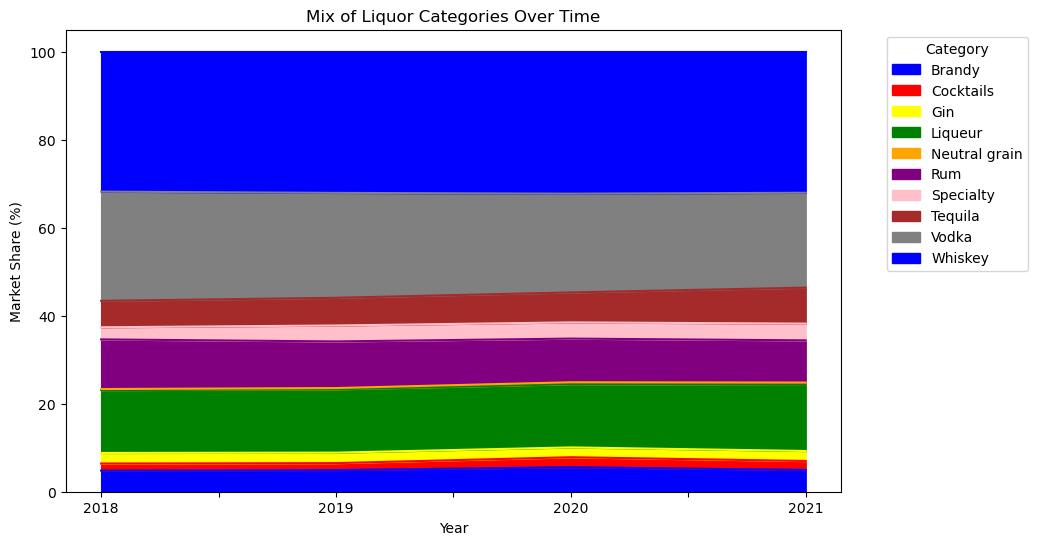

In [45]:
#Visualize the category share over each year in a stacked bar chart
merged_liquor_product_time_pivot = merged_liquor_product_time_df.pivot(index='Year', columns='Category_Name_Summarized', values='Liquor_Category_Yearly_Market_Share')
merged_liquor_product_time_pivot.plot(kind='area', stacked=True, figsize=(10, 6),color=['blue','red','yellow','green','orange','purple','pink','brown','gray'])
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.title('Mix of Liquor Categories Over Time')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insights:
- The overall liquor market increased in size ~20% pre and post COVID (not shown here)
- Whiskey and vodka remain the dominant categories, but vodka and rum shrank post-COVID (x to y%)
- Tequila is gaining share from ~6.3% in 2019 to ~8.2% in 2021 for 2% gain.
- While pre-mixed cocktails have a small share (~2%), they saw a percent gain ~25%

b. What is driving the growth in tequila sales (price, volume sold, distribution, etc.)?

To understand sales growth, we can look at it mathematically:

- Sales = (Avg Price / Unit Volume) x (Total volume Sold)
- Total volume sold = (Avg volume / transaction) x (# transactions)
- Number transactions is proportional to # stores (distribution) a category is present at
- Volume can equal # bottles or total L sold, so we can calculate a 'per bottle' price and 'per liter' price. Per liter is better since it 'controls for' size of the bottles.

In summary, we should calculate: Avg price / unit volume, total volume sold (L), Avg volume / transaction, # stores present in
Let's calculate these metrics at the year-category level and look at YoY % changes. Whichever is highest drives it the most since these are linearly related to sales.

In [46]:
#Let us use our year-product category table, filtered for tequila.
#We can calculate all the metrics above with this table except # stores present
#Let us calculate this metric and join it

In [47]:
#Create dataframe with unique store count key
tequila_store_presence_df = liquor_data.groupby(['Year','Category_Name_Summarized']).agg(unique_count=('Store_Name', 'nunique'))
tequila_store_presence_df.columns = ['_'.join(col).strip() for col in tequila_store_presence_df.columns.values]
tequila_store_presence_df = tequila_store_presence_df.reset_index()
tequila_store_presence_df = tequila_store_presence_df.rename(columns={'u_n_i_q_u_e___c_o_u_n_t': 'Unique_Store_Presence'})
tequila_store_presence_df

,Year,Category_Name_Summarized,Unique_Store_Presence
0,2017,Brandy,878
1,2017,Cocktails,578
2,2017,Gin,768
3,2017,Liqueur,1184
4,2017,Neutral grain,311
...,...,...,...
45,2021,Rum,1928
46,2021,Specialty,1763
47,2021,Tequila,1893
48,2021,Vodka,1936


In [48]:
#join two tables
tequila_growth_analysis_table = pd.merge(merged_liquor_product_time_df, tequila_store_presence_df, on=['Year', 'Category_Name_Summarized'])
tequila_growth_analysis_table = tequila_growth_analysis_table[tequila_growth_analysis_table["Category_Name_Summarized"] == "Tequila"]
tequila_growth_analysis_table

,Year,Category_Name_Summarized,Invoice_Number_count,Sale_Dollars_sum,Volume_Sold_Liters_sum,Bottles_Sold_sum,Pack_sum,Sale_Dollars_Product_Year_Dollars,Total_Yearly_Sales,Liquor_Category_Yearly_Market_Share,Unique_Store_Presence
7,2018,Tequila,112881,20025109.88,868450.11,1091740.0,1403722,20.025110,333.311200,6.007932,1575
17,2019,Tequila,117909,21911868.04,930950.69,1180849.0,1457367,21.911868,348.279944,6.291453,1698
27,2020,Tequila,140923,27009098.90,1066462.35,1412218.0,1692068,27.009099,396.472957,6.812343,1824
37,2021,Tequila,147062,35013964.50,1267110.86,1630066.0,1625714,35.013965,428.068179,8.179530,1893


In [49]:
tequila_growth_analysis_table["Avg_Price_Per_Liter"] = tequila_growth_analysis_table["Sale_Dollars_sum"]/tequila_growth_analysis_table["Volume_Sold_Liters_sum"]
tequila_growth_analysis_table["Avg_Volume_Per_Transaction"] = tequila_growth_analysis_table["Volume_Sold_Liters_sum"]/tequila_growth_analysis_table["Invoice_Number_count"]
tequila_growth_analysis_table

,Year,Category_Name_Summarized,Invoice_Number_count,Sale_Dollars_sum,Volume_Sold_Liters_sum,Bottles_Sold_sum,Pack_sum,Sale_Dollars_Product_Year_Dollars,Total_Yearly_Sales,Liquor_Category_Yearly_Market_Share,Unique_Store_Presence,Avg_Price_Per_Liter,Avg_Volume_Per_Transaction
7,2018,Tequila,112881,20025109.88,868450.11,1091740.0,1403722,20.025110,333.311200,6.007932,1575,23.058446,7.693501
17,2019,Tequila,117909,21911868.04,930950.69,1180849.0,1457367,21.911868,348.279944,6.291453,1698,23.537088,7.895502
27,2020,Tequila,140923,27009098.90,1066462.35,1412218.0,1692068,27.009099,396.472957,6.812343,1824,25.325881,7.567695
37,2021,Tequila,147062,35013964.50,1267110.86,1630066.0,1625714,35.013965,428.068179,8.179530,1893,27.632913,8.616168


In [50]:
# Convert increase in sales to YoY % increase
Sales = [20.025110, 21.911868, 27.009099, 35.013965]
Sales_df = pd.Series(Sales)
sales_percent_change = Sales_df.pct_change() * 100
print(sales_percent_change)

0          NaN
1     9.421961
2    23.262421
3    29.637664
dtype: float64


In [51]:
# Convert increase in volume to YoY % increase
Volume = [868450.11, 930950.69, 1066462.35, 1267110.86]
Volume_df = pd.Series(Volume)
volume_percent_change = Volume_df.pct_change() * 100
print(volume_percent_change)

0          NaN
1     7.196796
2    14.556266
3    18.814402
dtype: float64


In [52]:
# Convert increase in price to YoY % increase
price = [23.058446, 23.537088, 25.325881, 27.632913]
price_df = pd.Series(price)
price_percent_change = price_df.pct_change() * 100
print(price_percent_change)

0         NaN
1    2.075777
2    7.599891
3    9.109385
dtype: float64


In [53]:
# Convert increase in unique stores to YoY % increase
unique_stores = [1575, 1698, 1824, 1893]
unique_stores_df = pd.Series(unique_stores)
unique_stores_percent_change = unique_stores_df.pct_change() * 100
print(unique_stores_percent_change)

0         NaN
1    7.809524
2    7.420495
3    3.782895
dtype: float64


Insights:
- Tequila YoY sales growth 2019 to 2020 and 2020 to 2021 was ~23% and ~30% respectively
- We see pretty cleanly this was driven by volume sold (14.5%, 18.8%) more than price (7.6%, 9.1%), accounting for ~22/23 and 28/29.5 growth pct points each year
- Within volume sold, we can see an increase in distribution in terms of unique stores present with 7.8% YoY 18' to '19, 7.4% YoY '19 to '20, and 3.8% '21
- If I had more time and access to cleaner brand data, I would investigate the unique brand count, as my guess would be more micro-brands in the market (e.g., Celebrity brands like Cas Amigos etc.) drove more distribution

# 3. In late 2019 Heaven Hill Brands bought a portfolio of liquor brands from Constellation Brands. What impact did this have on Heaven Hill’s growth?

a. What percentage of their growth in 2020 can be attributed to the acquisition?

Approach should be:
- Calculate Total growth in revenue in 2020
- Calculate Organic growth rate (without the acquisition)
- Calculate Growth rate attributable to the acquisition
- Calculate Percentage of growth attributed to the acquisition

Therefore, we should create a table that has year, CPG (vendor_name), Item_Description (e.g., Black Velvet), and sales revenues so we can remove the brands that Heaven Hill acquired from Constellation.
- To identify the brands that Heaven Hill acquired, we can look at brands that appear in transactions at BOTH companies in 2019
- We can then remove this list of brands from Heaven Hill's revenues in 2020
- Note I am assuming the acquisition happened cleanly right before 2020, which is not the case (e..g, it may have happened in August 2019).

In [54]:
#Create table with Year-CPG Name-Item Description-Sales revenues
CPG_Product_Sales_df = liquor_data.groupby(['Year', 'Vendor_Name','Item_Description']).agg({'Invoice_Number':['count'],'Sale_Dollars':['sum'], 'Volume_Sold_Liters':['sum']})
CPG_Product_Sales_df.columns = ['_'.join(col).strip() for col in CPG_Product_Sales_df.columns.values]
CPG_Product_Sales_df = CPG_Product_Sales_df.reset_index()
values_to_filter = ['2017', '2018']
CPG_Product_Sales_df = CPG_Product_Sales_df[~CPG_Product_Sales_df['Year'].isin(values_to_filter)]
CPG_Product_Sales_df

,Year,Vendor_Name,Item_Description,Invoice_Number_count,Sale_Dollars_sum,Volume_Sold_Liters_sum
5088,2019,3 BADGE CORPORATION,BOZAL CUISHE MEZCAL,1,354.00,4.50
5089,2019,3 BADGE CORPORATION,BOZAL TOBASICHE MEZCAL,2,708.00,9.00
5090,2019,3 BADGE CORPORATION,KIRK & SWEENEY 12YR OLD ANEJO,3,787.50,22.50
5091,2019,3 BADGE CORPORATION,KIRK & SWEENEY 18YR,3,639.00,13.50
5092,2019,3 BADGE CORPORATION,KIRK & SWEENEY 23YR,15,4445.64,85.50
...,...,...,...,...,...,...
16325,2021,"WORLDWIDE LIBATIONS, LLC",THE BITTER TRUTH PIMENTO DRAM,2,336.12,9.00
16326,2021,"WORLDWIDE LIBATIONS, LLC",THE BITTER TRUTH VIOLET LIQUEUR,63,5775.93,173.25
16327,2021,"WORLDWIDE LIBATIONS, LLC",TIKI LOVERS DARK RUM,44,3093.75,123.75
16328,2021,"WORLDWIDE LIBATIONS, LLC",TIKI LOVERS PINEAPPLE FLAVORED RUM,47,4237.50,169.50


In [55]:
CPG_Product_Sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11242 entries, 5088 to 16329
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    11242 non-null  object 
 1   Vendor_Name             11242 non-null  object 
 2   Item_Description        11242 non-null  object 
 3   Invoice_Number_count    11242 non-null  int64  
 4   Sale_Dollars_sum        11242 non-null  float64
 5   Volume_Sold_Liters_sum  11242 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 614.8+ KB


Insights: after analyzing the table, we see the list of brands Constellation divested includes Black Velvet, McMaster's, and Serpent's Bite. Black velvet drives most of sales, so let's focus on this for simplicty and add tag for removal for 2019 and 2020.

In [56]:
list_years = ['2019', '2020']
list_products = ['BLACK VELVET', 'BLACK VELVET MINI', 'BLACK VELVET PET', 'BLACK VELVET RESERVE', 'BLACK VELVET TOASTED CARAMEL']
CPG_Product_Sales_df["For_Removal"] = np.where(
    (CPG_Product_Sales_df['Year'].isin(list_years)) &
    (CPG_Product_Sales_df['Vendor_Name'] == 'HEAVEN HILL BRANDS') &
    (CPG_Product_Sales_df['Item_Description'].isin(list_products)),
    'Yes',
    'No'
)

In [57]:
Value_For_Removal = CPG_Product_Sales_df["For_Removal"].value_counts()
Value_For_Removal

No     11232
Yes       10
Name: For_Removal, dtype: int64

In [58]:
#Create aggregated table including the removal tags
CPG_Product_Sales_For_Calc_df = CPG_Product_Sales_df.groupby(['Year', 'Vendor_Name','For_Removal']).agg({'Sale_Dollars_sum':['sum']})
CPG_Product_Sales_For_Calc_df.columns = ['_'.join(col).strip() for col in CPG_Product_Sales_For_Calc_df.columns.values]
CPG_Product_Sales_For_Calc_df = CPG_Product_Sales_For_Calc_df.reset_index()
CPG_Product_Sales_For_Calc_df = CPG_Product_Sales_For_Calc_df[CPG_Product_Sales_For_Calc_df['Vendor_Name'] == 'HEAVEN HILL BRANDS']
CPG_Product_Sales_For_Calc_df

,Year,Vendor_Name,For_Removal,Sale_Dollars_sum_sum
66,2019,HEAVEN HILL BRANDS,No,8888661.97
67,2019,HEAVEN HILL BRANDS,Yes,2667747.51
273,2020,HEAVEN HILL BRANDS,No,10511633.02
274,2020,HEAVEN HILL BRANDS,Yes,17258048.86
496,2021,HEAVEN HILL BRANDS,No,27021134.00


In [60]:
#Calculate Heaven Hill total growth in revenue 2019 to 2020
Total_Growth_19_20 = 100*((CPG_Product_Sales_For_Calc_df['Sale_Dollars_sum_sum'].iloc[3] + CPG_Product_Sales_For_Calc_df['Sale_Dollars_sum_sum'].iloc[2]
                        - CPG_Product_Sales_For_Calc_df['Sale_Dollars_sum_sum'].iloc[1] - CPG_Product_Sales_For_Calc_df['Sale_Dollars_sum_sum'].iloc[0])
                        /((CPG_Product_Sales_For_Calc_df['Sale_Dollars_sum_sum'].iloc[1] + CPG_Product_Sales_For_Calc_df['Sale_Dollars_sum_sum'].iloc[0])))
Total_Growth_19_20

140.29679744439096

In [61]:
#Calculate Heaven Hill growth in revenue without the acquisition (organic) from 2019 to 2020
Organic_Growth_19_20 = 100*((CPG_Product_Sales_For_Calc_df['Sale_Dollars_sum_sum'].iloc[2] - CPG_Product_Sales_For_Calc_df['Sale_Dollars_sum_sum'].iloc[0])
                        /((CPG_Product_Sales_For_Calc_df['Sale_Dollars_sum_sum'].iloc[0])))
Organic_Growth_19_20

18.258890432302024

Insights:
- Most of Heaven Hill's growth 2019 to 2020 can be attributed to the acquisition.
- It grew in total 140% its 2019 revenues (more than doubled) including the acquisition
- Without it, Heaven Hill would have grown ~18% its revenues in 2019, comparable to the market as a whole
- (140 - 18)/140 ~87% of its growth can be attributed to the acquisition

b. What was the impact of this acquisition on Heaven Hill’s run-rate (organic) growth?

Approach should be:
- We can look at Heaven Hill organic growth 2019 to 2020
- Then, we can look at Heaven Hill's run rate from 2020 to 2021. Because it has already acquired the brands, this is now organic growth.
- We can compare the run rates.

In [62]:
#Calculate Heaven Hill's growth in revenue from 2020 to 2021. We can include the acquired brands, now
Organic_Growth_20_21 = 100*((CPG_Product_Sales_For_Calc_df['Sale_Dollars_sum_sum'].iloc[4]
                             - CPG_Product_Sales_For_Calc_df['Sale_Dollars_sum_sum'].iloc[2]
                             - CPG_Product_Sales_For_Calc_df['Sale_Dollars_sum_sum'].iloc[3])
                             /((CPG_Product_Sales_For_Calc_df['Sale_Dollars_sum_sum'].iloc[2]
                             + CPG_Product_Sales_For_Calc_df['Sale_Dollars_sum_sum'].iloc[3])))
Organic_Growth_20_21

-2.6955579946312263

Insights:
- We notice the acquisition has decreased Heaven Hill's growth rate. Actually it flattened it
- We see Heaven Hill's run rate 2019 to 2020 was ~18% YoY, healthy growth
- From 2020 to 2021, after its acquisition, sales actually decreased slightly and we saw run rate flatten to -2.7% YoY
- Looking at product data, they seem to have failed to grow Black Velvet and this may have even cannibalized other sales, especially if they have not expanded their distribution footprint

# 4. Grouping individual store brands together (e.g., all of Walmart, Liquor Barn, Hy-Vee, etc.), who are the top 10 retailers by year?

Approach is to:
- i. Explore and tag top distributors (e.g., Walmart, Hy-Vee, Local)
- ii. Create table grouping distributor market shares by year, sorted highest to lowest using same approach is problem 2 for market share
- iii. Analyze for insight

i. Explore and tag *distributors* to isolate top ones to track (e.g., Walmart, Hy-Vee, Local)

In [63]:
#create distributor distribution :).
value_store_names = liquor_data["Store_Name"].value_counts()
value_store_names

HY-VEE #3 / BDI / DES MOINES            76589
CENTRAL CITY 2                          68077
CENTRAL CITY LIQUOR, INC.               62538
HY-VEE FOOD STORE / CEDAR FALLS         61398
HY-VEE WINE AND SPIRITS / BETTENDORF    52904
                                        ...  
THOME ENTERPRISES LLC                       1
HY-VEE #7                                   1
SMOKIN' JOE'S #15 TOBACCO & LIQUOR O        1
LIQUOR BARN, INC.                           1
CATS EYE DISTILLERY, LLC                    1
Name: Store_Name, Length: 2259, dtype: int64

In [64]:
#Now I want to convert this to a dataframe so I can export it and then eventually join it to retag with categories
value_store_names = value_store_names.rename_axis("Store_Name").reset_index(name="Frequency")
value_store_names

,Store_Name,Frequency
0,HY-VEE #3 / BDI / DES MOINES,76589
1,CENTRAL CITY 2,68077
2,"CENTRAL CITY LIQUOR, INC.",62538
3,HY-VEE FOOD STORE / CEDAR FALLS,61398
4,HY-VEE WINE AND SPIRITS / BETTENDORF,52904
...,...,...
2254,THOME ENTERPRISES LLC,1
2255,HY-VEE #7,1
2256,SMOKIN' JOE'S #15 TOBACCO & LIQUOR O,1
2257,"LIQUOR BARN, INC.",1


In [65]:
#export this to xlsx
value_store_names.to_excel("C:\\Users\\52450\\Downloads\\value_store_names_mapping.xlsx")

In [66]:
#upload Excel with new mapping
Distributor_Names = pd.read_excel(r"C:\Users\52450\Downloads\value_store_names_mapping_updated.xlsx")
Distributor_Names

,Store_Name,Store_Name_Summarized
0,CASEY'S GENERAL STORE #1548 / ANKENY,CASEY'S GENERAL STORE
1,CASEY'S GENERAL STORE #3055 / GRUNDY CENTER,CASEY'S GENERAL STORE
2,CASEY'S GENERAL STORE #3031 / GARNER,CASEY'S GENERAL STORE
3,CASEY'S GENERAL STORE #2813 / FORT DODGE,CASEY'S GENERAL STORE
4,CASEY'S GENERAL STORE # 2792/CEDAR RAPIDS,CASEY'S GENERAL STORE
...,...,...
2254,YESWAY STORE # 10025/ NEWTON,Mid/Local Store
2255,YESWAY STORE # 10016/ FORT DODGE,Mid/Local Store
2256,YESWAY #1103,Mid/Local Store
2257,YOUR PRIVATE BAR / URBANDALE,Mid/Local Store


In [67]:
#Add new column for summarized store names
liquor_data_stores = liquor_data.merge(Distributor_Names, how = "outer", on = ["Store_Name"])
liquor_data_stores

,Invoice_Number,Date,Store Number,Store_Name,Address,City,Zip_Code,Store_Location,County Number,County,Category,Category_Name,Vendor Number,Vendor_Name,Item Number,Item_Description,Pack,Bottle_Volume_ML,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_Liters,Volume_Sold_Gallons,Month,Quarter,Year,Month_Year,Category_Name_Summarized,Store_Name_Summarized
0,INV-09250800015,2017-12-15,4594,QUIK TRIP #554 / SW 63RD DM,901 SW 63RD ST,DES MOINES,50312.0,POINT (-93.703165 41.569715),77.0,POLK,1031200.0,AMERICAN FLAVORED VODKA,205.0,E & J GALLO WINERY,40593,NEW AMSTERDAM PEACH,24,375.0,3.50,5.25,4.0,21.00,1.50,0.40,12,4,2017,12-2017,Vodka,QUIK TRIP
1,INV-09250800016,2017-12-15,4594,QUIK TRIP #554 / SW 63RD DM,901 SW 63RD ST,DES MOINES,50312.0,POINT (-93.703165 41.569715),77.0,POLK,1031200.0,AMERICAN FLAVORED VODKA,205.0,E & J GALLO WINERY,40192,NEW AMSTERDAM PINEAPPLE,24,375.0,3.50,5.25,3.0,15.75,1.12,0.30,12,4,2017,12-2017,Vodka,QUIK TRIP
2,INV-09250800024,2017-12-15,4594,QUIK TRIP #554 / SW 63RD DM,901 SW 63RD ST,DES MOINES,50312.0,POINT (-93.703165 41.569715),77.0,POLK,1031200.0,AMERICAN FLAVORED VODKA,380.0,PHILLIPS BEVERAGE,39865,UV BLUE RASPBERRY,24,375.0,3.45,5.18,8.0,41.44,3.00,0.79,12,4,2017,12-2017,Vodka,QUIK TRIP
3,INV-09250800023,2017-12-15,4594,QUIK TRIP #554 / SW 63RD DM,901 SW 63RD ST,DES MOINES,50312.0,POINT (-93.703165 41.569715),77.0,POLK,1031200.0,AMERICAN FLAVORED VODKA,380.0,PHILLIPS BEVERAGE,39865,UV BLUE RASPBERRY,24,375.0,3.45,5.18,72.0,372.96,27.00,7.13,12,4,2017,12-2017,Vodka,QUIK TRIP
4,INV-09400400031,2017-12-22,4594,QUIK TRIP #554 / SW 63RD DM,901 SW 63RD ST,DES MOINES,50312.0,POINT (-93.703165 41.569715),77.0,POLK,1031200.0,AMERICAN FLAVORED VODKA,205.0,E & J GALLO WINERY,40598,NEW AMSTERDAM RED BERRY,24,375.0,3.50,5.25,24.0,126.00,9.00,2.38,12,4,2017,12-2017,Vodka,QUIK TRIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10074789,INV-40009600001,2021-09-13,9038,TEMPLETON DISTILLING LLC,209 E 3RD ST,TEMPLETON,51463.0,POINT (-94.936366 41.917072),14.0,CARROLL,1011700.0,CORN WHISKIES,573.0,TEMPLETON DISTILLING LLC,926442,TEMPLETON RYE STRAIGHT CORN WHISKEY,6,750.0,34.73,52.10,600.0,31260.00,450.00,118.87,9,3,2021,9-2021,Whiskey,Mid/Local Store
10074790,INV-09328500001,2017-12-19,2647,HY-VEE #7,5050 EDGEWOOD RD,CEDAR RAPIDS,52411.0,POINT (-91.701581 42.030129),57.0,LINN,1052100.0,IMPORTED BRANDIES,420.0,MOET HENNESSY USA,48106,HENNESSY VS COGNAC,12,750.0,19.99,29.99,1.0,29.24,0.75,0.20,12,4,2017,12-2017,Brandy,HY-VEE
10074791,INV-09270700001,2017-12-15,5176,SMOKIN' JOE'S #15 TOBACCO & LIQUOR O,455 EDGEWOOD RD NW,CEDAR RAPIDS,52405.0,POINT (-91.715903 41.97805),57.0,LINN,1082200.0,IMPORTED SCHNAPPS,421.0,SAZERAC COMPANY INC,69656,DR. MCGILLICUDDY'S MENTHOLMINT,12,750.0,8.66,12.99,1.0,0.00,0.75,0.19,12,4,2017,12-2017,Liqueur,SMOKIN' JOE'S
10074792,INV-09891600001,2018-01-19,2460,"LIQUOR BARN, INC.",721 CENTRAL AVENUE WEST,HAMPTON,50441.0,POINT (-93.21693 42.741728),35.0,FRANKLIN,1901200.0,SPECIAL ORDER ITEMS,421.0,SAZERAC COMPANY INC,902424,WISER'S DELUXE CANADIAN,12,1000.0,10.59,15.89,12.0,190.68,12.00,3.17,1,1,2018,1-2018,Specialty,Mid/Local Store


ii. Create table with summarized distributors and a few different metrics such as: sales revenue and market share

In [68]:
liquor_data_stores = liquor_data_stores.groupby(['Year', 'Store_Name_Summarized']).agg({'Invoice_Number':['count'],'Sale_Dollars':['sum'], 'Volume_Sold_Liters':['sum']})
liquor_data_stores.columns = ['_'.join(col).strip() for col in liquor_data_stores.columns.values]
liquor_data_stores = liquor_data_stores.reset_index()
values_to_filter = ['2017']
liquor_data_stores = liquor_data_stores[~liquor_data_stores['Year'].isin(values_to_filter)]
liquor_data_stores = liquor_data_stores.rename(columns={'Store_Name_Summarized': 'Distributor_Name'})
liquor_data_stores

,Year,Distributor_Name,Invoice_Number_count,Sale_Dollars_sum,Volume_Sold_Liters_sum
11,2018,CASEY'S GENERAL STORE,80438,8.415243e+06,628552.84
12,2018,FAREWAY STORES,123841,2.151867e+07,1664200.31
13,2018,HY-VEE,771219,1.226211e+08,7772077.79
14,2018,KUM & GO,89335,6.028414e+06,408121.84
15,2018,KWIK SHOP,11135,7.260102e+05,50542.13
...,...,...,...,...,...
50,2021,QUIK TRIP,21890,1.151995e+06,63601.91
51,2021,SMOKIN' JOE'S,41671,1.930305e+06,111049.40
52,2021,TARGET,18173,4.308405e+06,219007.85
53,2021,WAL-MART,163593,4.659687e+07,3079672.40


Apply the same approach as in problem 2 to add a total column and market share column

In [69]:
# Create year-level sales data frame
liquor_year_revenues = liquor_data.groupby(['Year']).agg({'Sale_Dollars':['sum']})
liquor_year_revenues.columns = ['_'.join(col).strip() for col in liquor_year_revenues.columns.values]
liquor_year_revenues = liquor_year_revenues.reset_index()
liquor_year_revenues = liquor_year_revenues[liquor_year_revenues['Year'] != '2017']
liquor_year_revenues = liquor_year_revenues.rename(columns={'Sale_Dollars_Millions': 'Total_Yearly_Sales'})
liquor_year_revenues

,Year,Sale_Dollars_sum
1,2018,3.333112e+08
2,2019,3.482799e+08
3,2020,3.964730e+08
4,2021,4.280682e+08


In [70]:
# Join this column to liquor_data_stores
liquor_data_stores = pd.merge(liquor_data_stores, liquor_year_revenues, on='Year', how='outer')
liquor_data_stores

,Year,Distributor_Name,Invoice_Number_count,Sale_Dollars_sum_x,Volume_Sold_Liters_sum,Sale_Dollars_sum_y
0,2018,CASEY'S GENERAL STORE,80438,8.415243e+06,628552.84,3.333112e+08
1,2018,FAREWAY STORES,123841,2.151867e+07,1664200.31,3.333112e+08
2,2018,HY-VEE,771219,1.226211e+08,7772077.79,3.333112e+08
3,2018,KUM & GO,89335,6.028414e+06,408121.84,3.333112e+08
4,2018,KWIK SHOP,11135,7.260102e+05,50542.13,3.333112e+08
...,...,...,...,...,...,...
39,2021,QUIK TRIP,21890,1.151995e+06,63601.91,4.280682e+08
40,2021,SMOKIN' JOE'S,41671,1.930305e+06,111049.40,4.280682e+08
41,2021,TARGET,18173,4.308405e+06,219007.85,4.280682e+08
42,2021,WAL-MART,163593,4.659687e+07,3079672.40,4.280682e+08


In [71]:
#Rename columns to sensical values
liquor_data_stores = liquor_data_stores.rename(columns={'Sale_Dollars_sum_x': 'Distributor_Sales','Sale_Dollars_sum_y': 'Total_Yearly_Sales'})
liquor_data_stores

,Year,Distributor_Name,Invoice_Number_count,Distributor_Sales,Volume_Sold_Liters_sum,Total_Yearly_Sales
0,2018,CASEY'S GENERAL STORE,80438,8.415243e+06,628552.84,3.333112e+08
1,2018,FAREWAY STORES,123841,2.151867e+07,1664200.31,3.333112e+08
2,2018,HY-VEE,771219,1.226211e+08,7772077.79,3.333112e+08
3,2018,KUM & GO,89335,6.028414e+06,408121.84,3.333112e+08
4,2018,KWIK SHOP,11135,7.260102e+05,50542.13,3.333112e+08
...,...,...,...,...,...,...
39,2021,QUIK TRIP,21890,1.151995e+06,63601.91,4.280682e+08
40,2021,SMOKIN' JOE'S,41671,1.930305e+06,111049.40,4.280682e+08
41,2021,TARGET,18173,4.308405e+06,219007.85,4.280682e+08
42,2021,WAL-MART,163593,4.659687e+07,3079672.40,4.280682e+08


In [72]:
# Add a calculated market share column, sorting from highest to lowest by year
liquor_data_stores["Distributor_Yearly_Market_Share"] = (liquor_data_stores["Distributor_Sales"]/liquor_data_stores["Total_Yearly_Sales"])*100
liquor_data_stores = liquor_data_stores.sort_values(by=['Year', 'Distributor_Yearly_Market_Share'])
liquor_data_stores

,Year,Distributor_Name,Invoice_Number_count,Distributor_Sales,Volume_Sold_Liters_sum,Total_Yearly_Sales,Distributor_Yearly_Market_Share
4,2018,KWIK SHOP,11135,7.260102e+05,50542.13,3.333112e+08,0.217818
6,2018,QUIK TRIP,25601,1.066260e+06,67027.91,3.333112e+08,0.319899
7,2018,SMOKIN' JOE'S,47967,2.264582e+06,156680.27,3.333112e+08,0.679420
10,2018,WALGREENS,21392,3.046992e+06,214563.22,3.333112e+08,0.914158
8,2018,TARGET,19234,3.398614e+06,186715.35,3.333112e+08,1.019652
...,...,...,...,...,...,...,...
33,2021,CASEY'S GENERAL STORE,207464,2.310854e+07,1253964.85,4.280682e+08,5.398333
34,2021,FAREWAY STORES,152381,2.740517e+07,1911016.03,4.280682e+08,6.402057
42,2021,WAL-MART,163593,4.659687e+07,3079672.40,4.280682e+08,10.885385
35,2021,HY-VEE,772677,1.430523e+08,8387818.56,4.280682e+08,33.418102


iii. Finally we find best way to visualize the table for insight

In [73]:
pivot_liquor_data_stores = liquor_data_stores.pivot(index='Year', columns='Distributor_Name', values='Distributor_Yearly_Market_Share')
pivot_liquor_data_stores = pivot_liquor_data_stores[pivot_liquor_data_stores.sum().sort_values(ascending=False).index]
pivot_liquor_data_stores

Distributor_Name,Mid/Local Store,HY-VEE,WAL-MART,FAREWAY STORES,CASEY'S GENERAL STORE,KUM & GO,TARGET,WALGREENS,SMOKIN' JOE'S,QUIK TRIP,KWIK SHOP
Year,,,,,,,,,,,
2018,37.261205,36.788769,12.009666,6.456029,2.524741,1.808644,1.019652,0.914158,0.679420,0.319899,0.217818
2019,37.260171,36.144789,12.122400,6.628097,3.227671,1.724716,0.940548,0.844800,0.587990,0.327430,0.191387
2020,37.081915,34.822811,11.324265,7.516399,4.447052,1.817711,1.197721,0.746695,0.544039,0.309516,0.191877
2021,39.763620,33.418102,10.885385,6.402057,5.398333,1.673069,1.006476,0.566886,0.450934,0.269115,0.166022


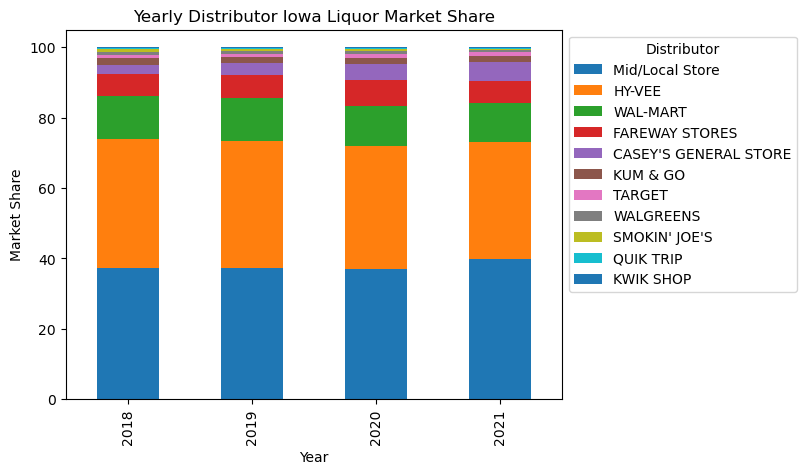

In [74]:
pivot_liquor_data_stores.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Market Share')
plt.title('Yearly Distributor Iowa Liquor Market Share')
plt.legend(title='Distributor', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

Insights:
- We see Hy-Vee is the dominant distributor each year, though it's share shrank ~3% over 4 years
- Several players did a better job at capturing share during COVID, including FAREWAY STORES and CASEY'S GENERAL STORE
- Other larger distributors also seem to be losing a little share over time including Walmart aned Walgreen's
- Overall, CASEY's GENERAL STOREseems to be on the rise, taking share, as well as newer or entrants or local players